In [1]:
import numpy as np
import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.morphology import disk

from echo_lv.data import LV_EKB_Dataset
from echo_lv.segmentation.level_set import Level_Set, GAC

ekb = LV_EKB_Dataset(img_size=(512, 512), normalize=False)

Dataset is correct.


In [2]:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', unicode=True)
rc('text.latex', preamble=r'\usepackage[russian]{babel}')

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
# imgs, msks = ekb.get_sequence('05', 'DKMP')
# imgs, msks = ekb.get_sequence('04', 'Norma')
# imgs, msks = ekb.get_sequence('12', 'Pathology_Old')

In [4]:
print(imgs[0].min(), imgs[0].max())
print(msks[0].min(), msks[0].max())

0.0 248.0
0.0 255.0


In [5]:
ls = Level_Set(msks[0], C = 1, sigma=2, iters=150, dt=1)
gac = GAC(msks[0], C = 1, sigma=2, w = [0.7, 0.2, 0.1], iters = 300, v = 1, dt = 1)

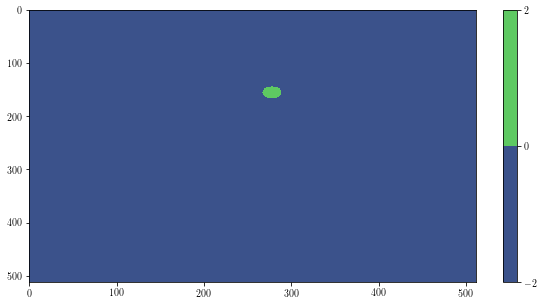

In [6]:
plt.figure(figsize=(10, 5))
c = plt.contourf(ls.init_phi(msks[0]), 0);
plt.colorbar()
plt.gca().invert_yaxis()

## Level Set

(-0.5, 511.5, 511.5, -0.5)

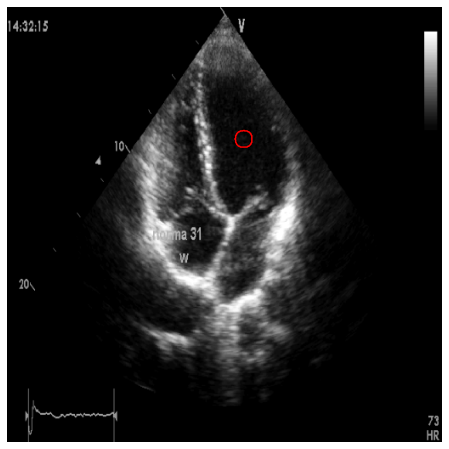

In [7]:
index=10
plt.figure(figsize=(8,8),frameon=False)
plt.imshow(imgs[0], cmap=plt.cm.gray)
plt.contour(ls.init_phi(msks[0]), 0, cmap=plt.cm.brg);
plt.axis('off')
# plt.title('Начальная инициализация контура на уровне $c=0$ функции $\phi$')
# plt.savefig('level_set/init_surf.png', bbox_inches='tight', pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


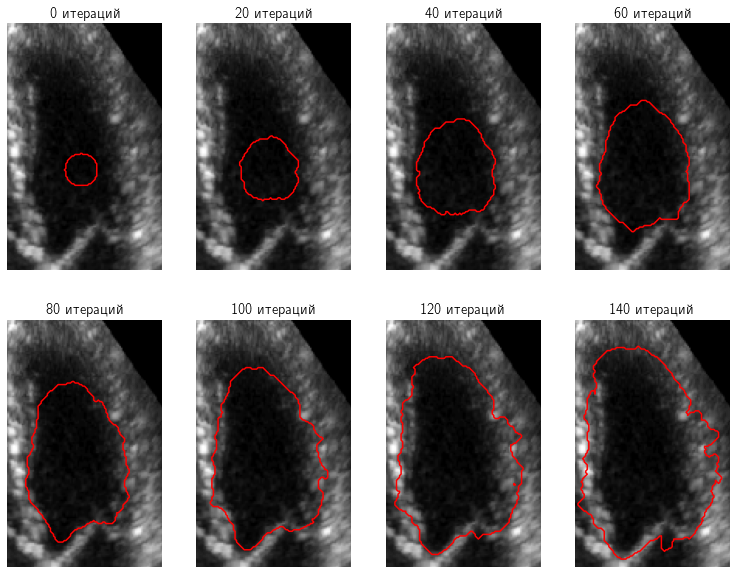

In [8]:
plt.figure(figsize=(13,10),frameon=False)
ls.predict(imgs[index], contin=False, it=0)
for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.imshow(imgs[index], cmap=plt.cm.gray)
    plt.contour(ls.predict(imgs[index], contin=True, it=i * 20), 0, colors='r');
    plt.xlim(230,330)
    plt.ylim(60,220)
    plt.axis('off')
    plt.gca().invert_yaxis()
    plt.title(str((i) * 20) + ' итераций', fontsize=15)

plt.savefig('level_set/ls_result.png', bbox_inches='tight', dpi=300, pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: No contour levels were found within the data range.
  after removing the cwd from sys.path.


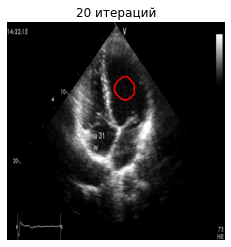

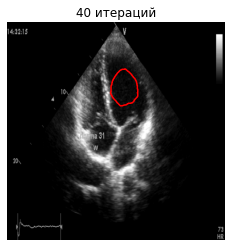

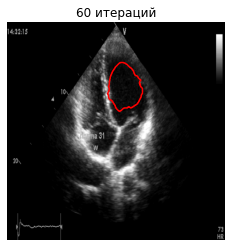

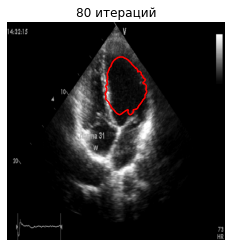

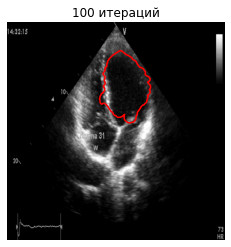

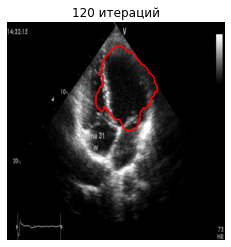

In [151]:
for i in range(1,7):
    plt.figure(figsize=(4,4),frameon=False)
    plt.imshow(imgs[0], cmap=plt.cm.gray)
    plt.contour(ls.predict(imgs[index], it=i * 20), 0, colors='r');
    plt.title(str((i) * 20) + ' итераций')
    plt.axis('off')
#     plt.savefig('level_set/ls_' + str((i) * 20) +'_iters.png', bbox_inches='tight', pad_inches=0)

## GAC

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


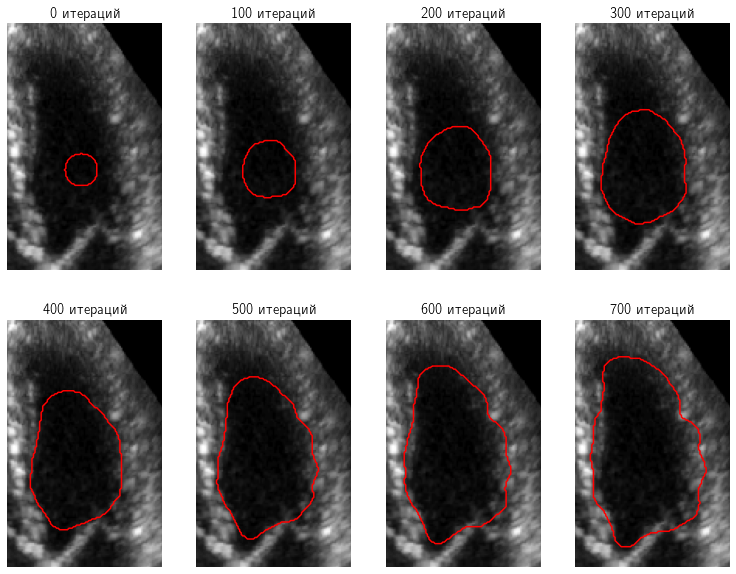

In [9]:
index = 10
plt.figure(figsize=(13,10),frameon=False)
gac.cur_iter=0
for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.imshow(imgs[index], cmap=plt.cm.gray)
    plt.contour(gac.predict(imgs[index], contin=True, it= i * 100), 0, colors='r');
    plt.xlim(230,330)
    plt.ylim(60,220)
    plt.axis('off')
    plt.gca().invert_yaxis()
    plt.title(str((i) * 100) + ' итераций', fontsize=15)

plt.savefig('level_set/gac_result.png', bbox_inches='tight', dpi=300, pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


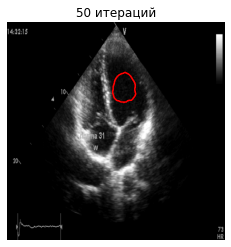

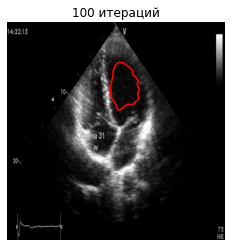

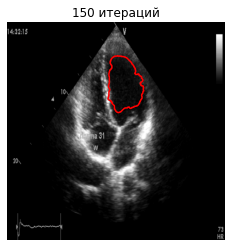

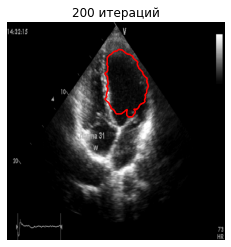

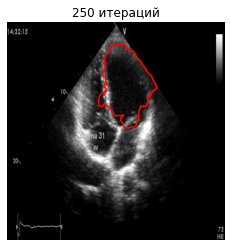

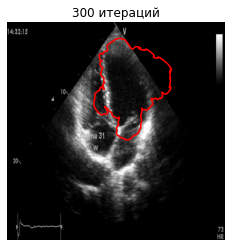

In [153]:
gac.cur_iter=0
for i in range(1,7):
    plt.figure(figsize=(4,4),frameon=False)
    plt.imshow(imgs[0], cmap=plt.cm.gray)
    plt.contour(gac.predict(imgs[index], contin=True, it=i * 50), 0, colors='r');
    plt.title(str((i) * 50) + ' итераций')
    plt.axis('off')
#     plt.savefig('level_set/gac_' + str((i) * 100) +'_iters.png', bbox_inches='tight', pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


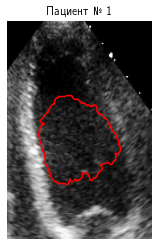

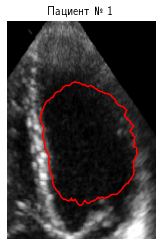

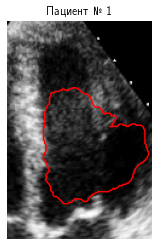

In [10]:
l = [{'patient' : '04', 'category' : 'Norma' },
     {'patient' : '21', 'category' : 'Norma_Old' },
     {'patient' : '05', 'category' : 'DKMP' },
    ]
for i, it in enumerate(l):
    imgs, msks = ekb.get_sequence(it['patient'], it['category'])
    ls = Level_Set(msks[0], C = 1)
    plt.figure(figsize=(4,4),frameon=False)
    plt.imshow(imgs[0], cmap=plt.cm.gray)
    plt.contour(ls.predict(imgs[0], it=100), 0, colors='r');
    plt.title('Пациент № 1')
    plt.axis('off')
    if i == 0:
        plt.xlim(210, 370)
        plt.ylim(120, 360)
    elif i == 1:
        plt.xlim(200, 350)
        plt.ylim(30, 250)
    elif i == 2:
        plt.xlim(240, 360)
        plt.ylim(130, 310)
    plt.gca().invert_yaxis()
    plt.savefig('level_set/ls_' + str(i+1) +'.png', bbox_inches='tight', dpi=300, pad_inches=0)

## Подбор порога

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from echo_lv.data import LV_EKB_Dataset
from echo_lv.metrics import dice
from echo_lv.segmentation.level_set import Level_Set, GAC

ekb = LV_EKB_Dataset(img_size=(512, 512),)


dice_1 = []
imgs, msks = ekb.get_sequence('04', 'Norma')
segm = Level_Set(msks[0], C = 1)
for i in range(300):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_1.append(dice(msks[0], msk_pred))
dice_2 = []
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
segm = Level_Set(msks[0], C = 1)
for i in range(300):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_2.append(dice(msks[0], msk_pred))
dice_3 = []
imgs, msks = ekb.get_sequence('05', 'DKMP')
segm = Level_Set(msks[0], C = 1)
for i in range(300):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_3.append(dice(msks[0], msk_pred))

Dataset is correct.


In [11]:
iters_ls_1 = np.argmax(dice_1)
iters_ls_2 = np.argmax(dice_2)
iters_ls_3 = np.argmax(dice_3)

Text(0.5, 1.0, 'Метод уровневых множеств')

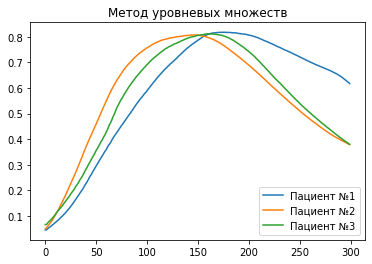

In [12]:
plt.plot(dice_1, label = 'Пациент №1')
plt.plot(dice_2, label = 'Пациент №2')
plt.plot(dice_3, label = 'Пациент №3')
plt.legend()
plt.title('Метод уровневых множеств')

In [24]:
print(iters_ls_1, iters_ls_2, iters_ls_3)

175 146 160


In [21]:
dice_1 = []
imgs, msks = ekb.get_sequence('04', 'Norma')
segm = GAC(msks[0], C = 1)
cur_dice = 0
for i in range(0, 2000, 10):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_1.append(dice(msks[0], msk_pred))
#     if cur_dice <= dice_1[-1]:
#         cur_dice = dice_1[-1]
#     else:
#         break
dice_2 = []
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
segm = GAC(msks[0], C = 1)
cur_dice = 0
for i in range(0, 2000, 10):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_2.append(dice(msks[0], msk_pred))
#     if cur_dice <= dice_2[-1]:
#         cur_dice = dice_2[-1]
#     else:
#         break
dice_3 = []
imgs, msks = ekb.get_sequence('05', 'DKMP')
segm = GAC(msks[0], C = 1)
cur_dice = 0
for i in range(0, 2000, 10):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_3.append(dice(msks[0], msk_pred))
#     if cur_dice <= dice_3[-1]:
#         cur_dice = dice_3[-1]
#     else:
#         break

In [22]:
iters_gac_1 = 10*np.argmax(dice_1)
iters_gac_2 = 10*np.argmax(dice_2)
iters_gac_3 = 10*np.argmax(dice_3)
print(iters_gac_1, iters_gac_2, iters_gac_3)

1210 860 1210


Text(0.5, 1.0, 'Метод ГАК')

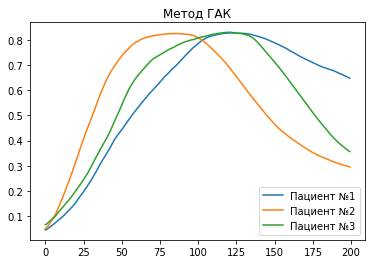

In [23]:
plt.plot(dice_1, label = 'Пациент №1')
plt.plot(dice_2, label = 'Пациент №2')
plt.plot(dice_3, label = 'Пациент №3')
plt.legend()
plt.title('Метод ГАК')

## Результаты сравнения

In [11]:
from echo_lv.segmentation.level_set import Level_Set, GAC
# imgs, msks = ekb.get_sequence('21', 'Norma_Old')
# imgs, msks = ekb.get_sequence('05', 'DKMP')
# imgs, msks = ekb.get_sequence('04', 'Norma')
# imgs, msks = ekb.get_sequence('12', 'Pathology_Old')
index = 10
it = 120

In [12]:
# imgs, msks = ekb.get_sequence('21', 'Norma_Old')
imgs, msks = ekb.get_sequence('05', 'DKMP')
# imgs, msks = ekb.get_sequence('04', 'Norma')
# imgs, msks = ekb.get_sequence('12', 'Pathology_Old')
# ls = Level_Set(msks[0], C = 1)
# gac = GAC(msks[0], C = 1, w = [0.7, 0.2, 0.1])

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


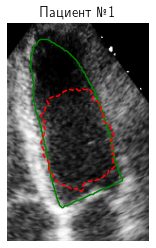

In [13]:
imgs, msks = ekb.get_sequence('04', 'Norma')
segm = Level_Set(msks[0], C = 1)
pred_msk = segm.predict(imgs[index], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №1', fontsize=15)
plt.xlim(215, 365)
plt.ylim(130, 360)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_ls_1.png', bbox_inches='tight', dpi=300, pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


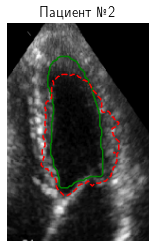

In [14]:
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
segm = Level_Set(msks[0], C = 1)
pred_msk = segm.predict(imgs[index], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №2', fontsize=15)
plt.xlim(200, 350)
plt.ylim(30, 260)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_ls_2.png', bbox_inches='tight', dpi=300, pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


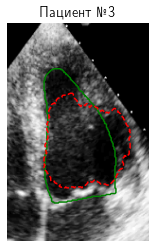

In [15]:
imgs, msks = ekb.get_sequence('05', 'DKMP')
segm = Level_Set(msks[0], C = 1)
pred_msk = segm.predict(imgs[index], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №3', fontsize=15)
plt.xlim(225, 375)
plt.ylim(105, 335)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_ls_3.png', bbox_inches='tight', dpi=300, pad_inches=0)

In [16]:
index = 10
it = 1000

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


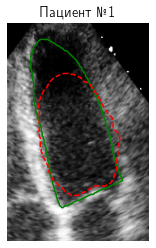

In [17]:
imgs, msks = ekb.get_sequence('04', 'Norma')
segm = GAC(msks[0], C = 1)
pred_msk = segm.predict(imgs[index], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №1', fontsize=15)
plt.xlim(215, 365)
plt.ylim(130, 360)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_gac_1.png', bbox_inches='tight', dpi=300, pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


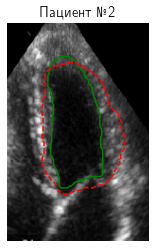

In [18]:
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
segm = GAC(msks[0], C = 1)
pred_msk = segm.predict(imgs[index], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №2', fontsize=15)
plt.xlim(200, 350)
plt.ylim(30, 260)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_gac_2.png', bbox_inches='tight', dpi=300, pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


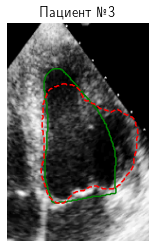

In [19]:
imgs, msks = ekb.get_sequence('05', 'DKMP')
segm = GAC(msks[0], C = 1)
pred_msk = segm.predict(imgs[3], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №3', fontsize=15)
plt.xlim(225, 375)
plt.ylim(105, 335)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_gac_3.png', bbox_inches='tight', dpi=300, pad_inches=0)

# Вычисление LS

In [ ]:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', unicode=True)
rc('text.latex', preamble=r'\usepackage[russian]{babel}')

In [16]:
import numpy as np
from tqdm import tqdm
from echo_lv.data import LV_EKB_Dataset
from echo_lv.segmentation.level_set import GAC, Level_Set
from echo_lv.metrics import dice, jaccard

In [17]:
ekb = LV_EKB_Dataset(dataset_path='/home/vasily/datasets/us_ekb', img_size=(512,512), normalize=False, shuffle=False)

Dataset is correct.


In [36]:
res = {}
for iters in np.arange(98, 101, 1):
    results = {'iters': [], 'dice' : [], 'jaccard' : [], 'info' : []}
    for i, (pat, cat, *_) in tqdm(ekb.df_patients.iterrows(), total = len(ekb.df_patients), leave=False, desc=str(iters)):
        imgs, msks = ekb.get_sequence(pat, cat)
        segm = Level_Set(msks[0], C = 1, sigma=2, iters=iters, dt = 2)
        for ind, (img, msk) in enumerate(zip(imgs, msks)):
            pred_msk = segm.predict(img)
            d = dice(msk, pred_msk)
            j = jaccard(msk, pred_msk)
#             results['iters'].append(segm.final_iter)
            results['dice'].append(d)
            results['jaccard'].append(j)
            results['info'].append([ind, pat, cat])
    res[iters] = results


In [37]:
prep_res = {}
for l in res.keys():
    prep_res[l] = res[l]['dice']
    
import pandas as pd
df = pd.DataFrame(prep_res)
df.to_csv('level_set/results/dist_ls.csv', header=True, index=False,)

In [110]:
df = pd.read_csv('level_set/results/dist_ls.csv')

dist_norm = lambda x : np.exp(- x ** 2 / 2) / (2 * np.pi) ** (1/2)
hs = [0.013599999999999973,
     0.012989999999999977,
     0.012259999999999983,
     0.011099999999999988,
     0.009899999999999996,
     0.0091,
     0.009389999999999999,
     0.009799999999999996,
     0.01106999999999999,
     0.011999999999999983,
     0.011289999999999988,
     0.009589999999999998,
     0.007450000000000009,
     0.006800000000000005,
     0.008000000000000007,
     0.009599999999999997,
     0.009669999999999998,
     0.009569999999999999,
     0.010099999999999994,
     0.010099999999999994,
     0.010199999999999994,
     0.010369999999999994,
     0.010469999999999993,
     0.009890000000000001,
     0.009580000000000003,
     0.009600000000000003,
     0.008800000000000007,
     0.008850000000000009,
     0.007600000000000012,
     0.007670000000000014,
     0.00830000000000001,
     0.008100000000000012,
     0.00849000000000001,
     0.00848000000000001,
     0.009180000000000006,
     0.009070000000000007,
     0.009280000000000005,
     0.009380000000000005,
     0.009350000000000006,
     0.009360000000000005,
     0.009570000000000004,
     0.009860000000000002,
     0.0099,
     0.009970000000000001,
     0.009870000000000002,
     0.009700000000000002,
     0.009600000000000003,
     0.009490000000000004,
     0.009400000000000004,
     0.009100000000000006,
     0.008800000000000007]

res = []

for it, d in tqdm(enumerate(df.iteritems()), total=df.shape[1]):
    direction = 1e-4
    a = np.array(d[1])
    f = -np.Inf
    if it < len(hs):
        h = hs[it]
    else:
        h = 0.01
    flag = True
    while abs(direction) >= 1e-5: 
        l = []
        h += direction
        if h <= 0:
            print('!')
            break 
        for i in range(len(a)):
            l.append(np.log(np.sum([dist_norm((a[i] - a[j]) / h) for j in range(len(a)) if i != j]) / (len(a) - 1) / h))
        r = np.sum(l) / len(a)              
        if r < f:
            h -= direction
            if flag:
                direction = -direction
                flag = False
            else:
                direction = direction * 1e-1
        else:
            f = r
    res.append(h)
hs = res

  0%|          | 0/51 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [42]:
hs = res

In [111]:
import matplotlib.pyplot as plt

dist_norm = lambda x : np.exp(- x ** 2 / 2) / (2 * np.pi) ** (1/2) 

def pz_approx(a, h, kernel, nums):
    t = np.linspace(min(a), max(a), nums)
    f = np.zeros(t.shape)
    for i in range(len(t)):
        for j in range(len(a)):
            f[i] += 1 / (len(a) * h) * np.sum(kernel((t[i] - a[j]) / h))
    return f

def get_quartiles(x, a):
    y = np.cumsum(a) / np.sum(a)
    indexes = np.argsort(abs(y - 0.05))[:2]
    q5 = x[indexes][0]
    indexes = np.argsort(abs(y - 0.5))[:2]
    q50 = x[indexes][0]
    indexes = np.argsort(abs(y - 0.95))[:2]
    q95 = x[indexes][0]
    return q5, q50, q95

# plt.figure(figsize=(20,40))
num_points = 200

q5s = []
q50s = []
q95s = []
df = pd.read_csv('level_set/results/dist_ls.csv')

for num, d in enumerate(df.iteritems()):
    a = np.array(d[1])
    hist, x, *_ = np.histogram(a, bins=100);
    hist = hist / sum(hist) / (x[1] - x[0])
#     plt.subplot(df.shape[1], 1, num + 1)
#     plt.bar([(x[i] + x[i+1]) / 2 for i in range(len(x) - 1)], hist, width=(x[1] - x[0]))
    t = np.linspace(min(a), max(a), num_points)
    f = pz_approx(a, hs[num], dist_norm, num_points)
    q5, q50, q95 = get_quartiles(t, f)
    q50s.append(q50)
    q5s.append(q5)
    q95s.append(q95)
#     plt.plot(t, f, 'r')

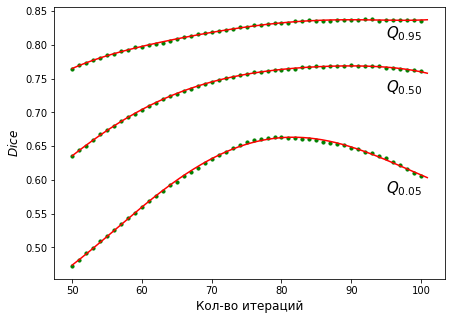

In [117]:
t = np.arange(50, len(q5s)+50, 0.1)

plt.figure(figsize=(7, 5))
plt.scatter(np.arange(50, len(q5s)+50, 1), q5s, s=10, c='g')
p = np.polyfit(np.arange(50, len(q5s)+50, 1), q5s, 5)
y = np.polyval(p, t)
plt.plot(t, y, 'r')
plt.text(95, 0.58, r'$Q_{0.05}$', fontsize=15)
plt.scatter(np.arange(50, len(q50s)+50, 1), q50s, s=10, c='g', label='О уровней')
p = np.polyfit(np.arange(50, len(q50s)+50, 1), q50s, 5)
y = np.polyval(p, t)
plt.plot(t, y, 'r')
plt.text(95, 0.73, r'$Q_{0.50}$', fontsize=15)
plt.scatter(np.arange(50, len(q95s)+50, 1), q95s, s=10, c='g', label='О уровней')
p = np.polyfit(np.arange(50, len(q95s)+50, 1), q95s, 5)
y = np.polyval(p, t)
plt.plot(t, y, 'r')
# plt.title(r'$L = 0$', fontsize=20)
plt.text(95, 0.81, r'$Q_{0.95}$', fontsize=15)
plt.xlabel(r'Кол-во итераций', fontsize=12)
plt.ylabel(r'$Dice$', fontsize=12)
plt.savefig('level_set/quartiles_ls_results.eps', bbox_inches='tight', pad_inches=0)

In [114]:
index = np.argmax(q5s)
print('Итерации: ', np.arange(50, len(q5s)+50, 1)[index])
print('Длина отрезка: ', q95s[index] - q5s[index])


Итерации:  80
Длина отрезка:  0.1689409741954525


In [120]:
import pandas as pd
df = pd.read_csv('level_set/results/dist_ls.csv')[str(80)]
df.to_csv('level_set/results/ls.csv', header=True, index=False,)
print(hs[index])

0.00830000000000001


## Вычисления GAC

In [53]:
import numpy as np
from tqdm import tqdm
from echo_lv.data import LV_EKB_Dataset
from echo_lv.segmentation.level_set import GAC, Level_Set
from echo_lv.metrics import dice, jaccard

In [54]:
ekb = LV_EKB_Dataset(dataset_path='/home/vasily/datasets/us_ekb', img_size=(512,512), normalize=False, shuffle=False)

Dataset is correct.


In [ ]:
res = {}
from_iters = 300
to_iters = 500

for iters in np.arange(from_iters, to_iters+1, 1):
    res[iters] = {'iters': [], 'dice' : [], 'jaccard' : [], 'info' : []}

for i, (pat, cat, *_) in tqdm(ekb.df_patients.iterrows(), total = len(ekb.df_patients), leave=False):
    imgs, msks = ekb.get_sequence(pat, cat)
    for ind, (img, msk) in enumerate(zip(imgs, msks)):
        gac = GAC(msk, C = 1, sigma=2, w = [0.7, 0.2, 0.1], iters = 1, v = 2, dt = 1)
        for iters in np.arange(from_iters, to_iters, 1):
            pred_msk = gac.predict(img, contin=True, it=iters)
            d = dice(msk, pred_msk)
            j = jaccard(msk, pred_msk)
            res[iters]['dice'].append(d)
            res[iters]['jaccard'].append(j)
#             res[iters]['info'].append([ind, pat, cat])

300:  74%|███████▍  | 70/94 [6:37:21<2:10:19, 325.82s/it] 

In [ ]:
prep_res = {}
res.pop(500)
for l in res.keys():
    prep_res[l] = res[l]['dice']
    
import pandas as pd
df = pd.DataFrame(prep_res)
df.to_csv('level_set/results/dist_gac.csv', header=True, index=False,)

In [121]:
dist_norm = lambda x : np.exp(- x ** 2 / 2) / (2 * np.pi) ** (1/2)

hs = [0.009890000000000001,
 0.009700000000000002,
 0.009560000000000004,
 0.009500000000000003,
 0.009200000000000005,
 0.008950000000000008,
 0.00867000000000001,
 0.00840000000000001,
 0.00830000000000001,
 0.00840000000000001,
 0.008780000000000008,
 0.009100000000000006,
 0.009300000000000004,
 0.009500000000000003,
 0.009650000000000004,
 0.009600000000000003,
 0.009570000000000004,
 0.009500000000000003,
 0.009400000000000004,
 0.009300000000000004,
 0.009190000000000005,
 0.008980000000000007,
 0.008600000000000009,
 0.00840000000000001,
 0.008700000000000008,
 0.009200000000000005,
 0.009700000000000002,
 0.009850000000000003,
 0.0101,
 0.01016,
 0.01008,
 0.01,
 0.009800000000000001,
 0.009600000000000003,
 0.009260000000000006,
 0.009100000000000006,
 0.009300000000000004,
 0.008860000000000008,
 0.00866000000000001,
 0.00830000000000001,
 0.008100000000000012,
 0.008590000000000009,
 0.009090000000000006,
 0.009270000000000006,
 0.009680000000000003,
 0.009890000000000001,
 0.0099,
 0.009800000000000001,
 0.009700000000000002,
 0.009460000000000005,
 0.008900000000000007,
 0.009090000000000006,
 0.009270000000000006,
 0.009450000000000005,
 0.009370000000000005,
 0.009370000000000005,
 0.009300000000000004,
 0.009000000000000006,
 0.009100000000000006,
 0.009200000000000005,
 0.009200000000000005,
 0.009400000000000004,
 0.009000000000000006,
 0.008600000000000009,
 0.008460000000000011,
 0.008790000000000008,
 0.008970000000000007,
 0.009200000000000005,
 0.009300000000000004,
 0.009260000000000006,
 0.009070000000000007,
 0.009100000000000006,
 0.009160000000000007,
 0.009300000000000004,
 0.009200000000000005,
 0.009100000000000006,
 0.008990000000000007,
 0.008800000000000007,
 0.008790000000000008,
 0.008890000000000007,
 0.009170000000000006,
 0.009200000000000005,
 0.009300000000000004,
 0.009290000000000005,
 0.009100000000000006,
 0.008770000000000009,
 0.008360000000000012,
 0.008090000000000012,
 0.007700000000000012,
 0.007580000000000013,
 0.007200000000000011,
 0.007480000000000013,
 0.007500000000000012,
 0.0077800000000000135,
 0.007900000000000013,
 0.007890000000000013,
 0.007970000000000014,
 0.007700000000000012,
 0.007700000000000012,
 0.007560000000000014,
 0.007770000000000014,
 0.008000000000000012,
 0.00830000000000001,
 0.00847000000000001,
 0.00865000000000001,
 0.008800000000000007,
 0.008950000000000008,
 0.009300000000000004,
 0.009480000000000004,
 0.009780000000000002,
 0.009980000000000001,
 0.0101,
 0.010199999999999999,
 0.010299999999999998,
 0.010399999999999998,
 0.010479999999999998,
 0.010489999999999998,
 0.010599999999999997,
 0.010699999999999996,
 0.010789999999999996,
 0.010879999999999996,
 0.010949999999999996,
 0.010999999999999994,
 0.011069999999999995,
 0.011179999999999994,
 0.011259999999999994,
 0.011369999999999993,
 0.011479999999999992,
 0.011459999999999993,
 0.011299999999999992,
 0.011099999999999994,
 0.010599999999999997,
 0.0101,
 0.01,
 0.0099,
 0.01008,
 0.0101,
 0.010299999999999998,
 0.010499999999999997,
 0.010859999999999996,
 0.010979999999999995,
 0.010999999999999994,
 0.010999999999999994,
 0.010899999999999995,
 0.010789999999999996,
 0.010599999999999997,
 0.01028,
 0.0099,
 0.009700000000000002,
 0.009470000000000004,
 0.009300000000000004,
 0.009200000000000005,
 0.009260000000000006,
 0.009300000000000004,
 0.009400000000000004,
 0.009570000000000004,
 0.009500000000000003,
 0.009490000000000004,
 0.009300000000000004,
 0.009100000000000006,
 0.009100000000000006,
 0.009100000000000006,
 0.009200000000000005,
 0.009360000000000005,
 0.009460000000000005,
 0.009580000000000003,
 0.009600000000000003,
 0.009790000000000002,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.009800000000000001,
 0.009700000000000002,
 0.009600000000000003,
 0.009680000000000003,
 0.009670000000000003,
 0.009660000000000004,
 0.009780000000000002,
 0.009790000000000002,
 0.009790000000000002,
 0.009700000000000002,
 0.009700000000000002,
 0.009800000000000001,
 0.009960000000000002,
 0.010050000000000002,
 0.01019,
 0.01016,
 0.0101,
 0.0101,
 0.0101,
 0.0101,
 0.010199999999999999,
 0.010379999999999999,
 0.010499999999999997,
 0.010549999999999999,
 0.010599999999999997,
 0.010559999999999998,
 0.010589999999999997,
 0.010459999999999999, 
    0.010399999999999998,
 0.010299999999999998,
 0.01036,
 0.010459999999999999,
 0.010599999999999997,
 0.010759999999999997,
 0.010899999999999995,
 0.011079999999999994,
 0.011099999999999994,
 0.011149999999999995,
 0.011169999999999994,
 0.011159999999999995,
 0.011099999999999994,
 0.011089999999999994,
 0.010999999999999994,
 0.010999999999999994,
 0.010959999999999996,
 0.010899999999999995,
 0.010799999999999995,
 0.010789999999999996,
 0.010699999999999996,
 0.010599999999999997,
 0.010669999999999997,
 0.010699999999999996,
 0.010799999999999995,
 0.010889999999999995,
 0.010879999999999996,
 0.010899999999999995,
 0.010869999999999996,
 0.010799999999999995,
 0.010779999999999996,
 0.010759999999999997,
 0.010699999999999996,
 0.010699999999999996,
 0.010669999999999997,
 0.010599999999999997,
 0.010499999999999997,
 0.010499999999999997,
 0.010559999999999998,
 0.010599999999999997,
 0.010799999999999995,
 0.010899999999999995,
 0.011089999999999994,
 0.011199999999999993,
 0.011359999999999993,
 0.011399999999999992,
 0.011489999999999992,
 0.011499999999999991,
 0.011579999999999991,
 0.01159999999999999,
 0.01159999999999999,
 0.011649999999999992,
 0.01159999999999999,
 0.011649999999999992,
 0.01159999999999999,
 0.01159999999999999,
 0.01159999999999999,
 0.011659999999999992,
 0.01169999999999999,
 0.011659999999999992,
 0.01159999999999999,
 0.011559999999999992,
 0.011499999999999991,
 0.011499999999999991,
 0.011449999999999993,
 0.011399999999999992,
 0.011469999999999992,
 0.011499999999999991,
 0.011459999999999993,
 0.011399999999999992,
 0.011489999999999992,
 0.011459999999999993,
 0.011499999999999991,
 0.011499999999999991,
 0.011559999999999992,
 0.011499999999999991,
 0.011559999999999992,
 0.011589999999999991,
 0.01159999999999999,
 0.01159999999999999,
 0.01159999999999999,
 0.01159999999999999,
 0.01159999999999999,
 0.01159999999999999,
 0.011659999999999992,
 0.01169999999999999,
 0.01178999999999999,
 0.01179999999999999,
 0.01179999999999999,
 0.01186999999999999,
 0.011899999999999989,
 0.011899999999999989,
 0.01196999999999999,
 0.011999999999999988,
 0.011999999999999988,
 0.012099999999999988,
 0.012099999999999988,
 0.012199999999999987,
 0.012289999999999987,
 0.012349999999999988,
 0.012399999999999986,
 0.012479999999999986,
 0.012499999999999985,
 0.012579999999999985,
 0.012599999999999984,
 0.012689999999999984,
 0.012699999999999984,
 0.012799999999999983,
 0.012869999999999984,
 0.012889999999999983,
 0.012969999999999983,
 0.012999999999999982,
 0.013079999999999982,
 0.01319999999999998,
 0.013269999999999981,
 0.013349999999999982,
 0.01339999999999998,
 0.013499999999999979,
 0.01355999999999998,
 0.013589999999999979,
 0.013599999999999978,
 0.013599999999999978,
 0.013599999999999978,
 0.01355999999999998,
 0.013499999999999979,
 0.01339999999999998,
 0.013279999999999981,
 0.013179999999999982,
 0.013079999999999982,
 0.012979999999999983,
 0.012759999999999985,
 0.012599999999999984,
 0.012489999999999985,
 0.012569999999999986,
 0.012469999999999986,
 0.012399999999999986,
 0.012469999999999986,
 0.012449999999999987,
 0.012499999999999985,
 0.012599999999999984,
 0.012589999999999985,
 0.012669999999999985,
 0.012689999999999984,
 0.012689999999999984,
 0.012799999999999983,
 0.012799999999999983,
 0.012889999999999983,
 0.012899999999999983,
 0.012899999999999983,
 0.012889999999999983,
 0.012899999999999983,
 0.012859999999999984,
 0.012859999999999984,
 0.012799999999999983,
 0.012799999999999983,
 0.012789999999999984,
 0.012559999999999986,
 0.012499999999999985,
 0.012459999999999987,
 0.012249999999999988,
 0.012059999999999989,
 0.01176999999999999,
 0.011499999999999991,
 0.011189999999999993,
 0.010999999999999994,
 0.010779999999999996,
 0.010459999999999999,
 0.01016,
 0.009960000000000002,
 0.009800000000000001,
 0.009600000000000003,
 0.009600000000000003,
 0.009460000000000005,
 0.009380000000000005,
 0.009490000000000004,
 0.009480000000000004,
 0.009500000000000003,
 0.009600000000000003,
 0.009690000000000002,
 0.009880000000000002,
 0.01008,
 0.010299999999999998,
 0.01045,
 0.010589999999999997,
 0.010769999999999997,
 0.010799999999999995,
 0.010899999999999995,
 0.010999999999999994,
 0.011099999999999994,
 0.011199999999999993,
 0.011369999999999993,
 0.011299999999999992,
 0.011399999999999992,
 0.011559999999999992,
 0.01159999999999999,
 0.01159999999999999,
 0.011559999999999992,
 0.011569999999999992,
 0.011649999999999992,
 0.01168999999999999,
 0.011649999999999992,
 0.01159999999999999,
 0.01159999999999999,
 0.011499999999999991,
 0.011359999999999993,
 0.011189999999999993,
 0.010999999999999994,
 0.010859999999999996,
 0.010759999999999997,
 0.010669999999999997,
 0.010579999999999997,
 0.010399999999999998,
 0.010289999999999999,
 0.01017,
 0.01017,
 0.01007,
 0.010060000000000001,
 0.010060000000000001,
 0.01,
 0.01,
 0.01,
 0.009980000000000001,
 0.009880000000000002,
 0.0099,
 0.0099,
 0.009800000000000001,
 0.009700000000000002,
 0.009770000000000003,
 0.009700000000000002,
 0.009690000000000002,
 0.009660000000000004,
 0.009600000000000003,
 0.009660000000000004,
 0.009660000000000004,
 0.009680000000000003,
 0.009700000000000002,
 0.009790000000000002,
 0.009880000000000002,
 0.009950000000000002,
 0.01007,
 0.010199999999999999,
 0.010399999999999998,
 0.010499999999999997,
 0.010589999999999997,
 0.010599999999999997,
 0.010759999999999997,
 0.010799999999999995,
 0.010999999999999994,
 0.011199999999999993,
 0.011279999999999993,
 0.011489999999999992,
 0.01159999999999999,
 0.01169999999999999,
 0.011899999999999989,
 0.011999999999999988,
 0.012199999999999987,
 0.012379999999999987,
 0.012499999999999985,
 0.012699999999999984,
 0.012799999999999983,
 0.012899999999999983,
 0.013069999999999983,
 0.01319999999999998,
 0.01329999999999998,
 0.01337999999999998,
 0.01339999999999998,
 0.01357999999999998,
 0.013599999999999978,
 0.013699999999999978,
 0.013699999999999978,
 0.013699999999999978,
 0.013799999999999977,
 0.013889999999999977,
 0.013869999999999978,
 0.013899999999999977,
 0.013899999999999977,
 0.013899999999999977,
 0.013899999999999977,
 0.013899999999999977,
 0.013959999999999978,
 0.013989999999999976,
 0.013999999999999976,
 0.013999999999999976,
 0.013899999999999977,
 0.013899999999999977,
 0.013799999999999977,
 0.013699999999999978,
 0.013599999999999978,
 0.013599999999999978,
 0.01346999999999998,
 0.01329999999999998,
 0.013049999999999983,
 0.012799999999999983,
 0.012669999999999985,
 0.012399999999999986,
 0.012269999999999988,
 0.012099999999999988,
 0.011899999999999989,
 0.01159999999999999,
 0.011369999999999993,
 0.010999999999999994,
 0.010749999999999997,
 0.01035,
 0.01028,
 0.009970000000000001,
 0.009800000000000001,
 0.009500000000000003,
 0.009390000000000004,
 0.009190000000000005,
 0.009000000000000006,
 0.008800000000000007,
 0.008760000000000009,
 0.00866000000000001,
 0.008700000000000008,
 0.008590000000000009,
 0.008600000000000009,
 0.00866000000000001,
 0.00857000000000001,
 0.008700000000000008,
 0.008800000000000007,
 0.008860000000000008,
 0.009000000000000006,
 0.009080000000000006,
 0.009100000000000006,
 0.009100000000000006,
 0.009000000000000006,
 0.009000000000000006,
 0.008980000000000007,
 0.008900000000000007,
 0.008890000000000007,
 0.008800000000000007,
 0.00865000000000001,
 0.00848000000000001,
 0.00830000000000001,
 0.008260000000000012,
 0.008070000000000013,
 0.007960000000000014,
 0.007860000000000015,
 0.007690000000000013,
 0.0075900000000000125,
 0.007400000000000012,
 0.007400000000000012,
 0.007200000000000011,
 0.0070000000000000106,
 0.00690000000000001,
 0.006780000000000011,
 0.006750000000000012,
 0.00670000000000001,
 0.006670000000000011,
 0.00680000000000001,
 0.006990000000000011,
 0.007090000000000011,
 0.007570000000000013,
 0.007800000000000013,
 0.008370000000000011,
 0.008800000000000007]

res = []
df = pd.read_csv('level_set/results/dist_gac.csv')

for it, d in tqdm(enumerate(df.iteritems()), total=df.shape[1]):
    if it == 200:
        break
    direction = 1e-4
    a = np.array(d[1])
    f = -np.Inf
    h = hs
#     if it < len(hs):
#         h = hs[it]
#     else:
#         h = 0.01
    flag = True
    while abs(direction) >= 1e-5: 
        l = []
        h += direction
        if h <= 0:
            print('!')
            break 
        for i in range(len(a)):
            l.append(np.log(np.sum([dist_norm((a[i] - a[j]) / h) for j in range(len(a)) if i != j]) / (len(a) - 1) / h))
        r = np.sum(l) / len(a)              
        if r < f:
            h -= direction
            if flag:
                direction = -direction
                flag = False
            else:
                direction = direction * 1e-1
        else:
            f = r
    res.append(h)
hs = res

  0%|          | 0/700 [00:00<?, ?it/s]


TypeError: 'float' object is not iterable

In [122]:
dist_norm = lambda x : np.exp(- x ** 2 / 2) / (2 * np.pi) ** (1/2) 

def pz_approx(a, h, kernel, nums):
    t = np.linspace(min(a), max(a), nums)
    f = np.zeros(t.shape)
    for i in range(len(t)):
        for j in range(len(a)):
            f[i] += 1 / (len(a) * h) * np.sum(kernel((t[i] - a[j]) / h))
    return f

def get_quartiles(x, a):
    y = np.cumsum(a) / np.sum(a)
    indexes = np.argsort(abs(y - 0.05))[:2]
    q5 = x[indexes][0]
    indexes = np.argsort(abs(y - 0.5))[:2]
    q50 = x[indexes][0]
    indexes = np.argsort(abs(y - 0.95))[:2]
    q95 = x[indexes][0]
    return q5, q50, q95

# plt.figure(figsize=(20,40))
num_points = 200

q5s = []
q50s = []
q95s = []
df = pd.read_csv('level_set/results/dist_gac_1.csv')

for num, d in enumerate(tqdm(df.iteritems(), total=df.shape[1])):
    a = np.array(d[1])
    hist, x, *_ = np.histogram(a, bins=100);
#     hist = hist / sum(hist) / (x[1] - x[0])
#     plt.subplot(df.shape[1], 1, num + 1)
#     plt.bar([(x[i] + x[i+1]) / 2 for i in range(len(x) - 1)], hist, width=(x[1] - x[0]))
    t = np.linspace(min(a), max(a), num_points)
    f = pz_approx(a, hs[num], dist_norm, num_points)
    q5, q50, q95 = get_quartiles(t, f)
    q50s.append(q50)
    q5s.append(q5)
    q95s.append(q95)
    if num == 300:
        break
#     plt.plot(t, f, 'r')

 43%|████▎     | 300/700 [25:25<33:54,  5.09s/it]


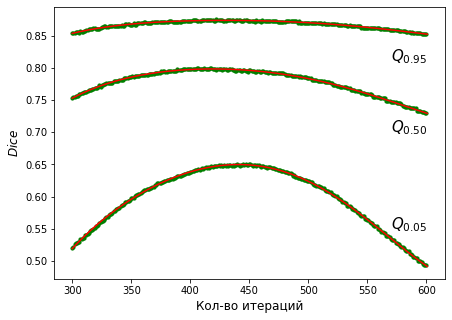

In [125]:
t = np.arange(300, len(q5s)+300, 0.1)

plt.figure(figsize=(7, 5))
plt.scatter(np.arange(300, len(q5s)+300, 1), q5s, s=10, c='g')
p = np.polyfit(np.arange(300, len(q5s)+300, 1), q5s, 5)
y = np.polyval(p, t)
plt.plot(t, y, 'r')
plt.text(570, 0.55, r'$Q_{0.05}$', fontsize=15)
plt.scatter(np.arange(300, len(q50s)+300, 1), q50s, s=10, c='g', label='О уровней')
p = np.polyfit(np.arange(300, len(q50s)+300, 1), q50s, 5)
y = np.polyval(p, t)
plt.plot(t, y, 'r')
plt.text(570, 0.70, r'$Q_{0.50}$', fontsize=15)
plt.scatter(np.arange(300, len(q95s)+300, 1), q95s, s=10, c='g', label='О уровней')
p = np.polyfit(np.arange(300, len(q95s)+300, 1), q95s, 5)
y = np.polyval(p, t)
plt.plot(t, y, 'r')
# plt.title(r'$L = 0$', fontsize=20)
plt.text(570, 0.81, r'$Q_{0.95}$', fontsize=15)
plt.xlabel(r'Кол-во итераций', fontsize=12)
plt.ylabel(r'$Dice$', fontsize=12)
plt.savefig('level_set/quartiles_gac_results.eps', bbox_inches='tight', pad_inches=0)

In [ ]:
index = np.argmax(q5s)
print('Итерации: ', np.arange(300, len(q5s)+300, 1)[index])
print('Длина отрезка: ', q95s[index] - q5s[index])

Итерации:  450
Длина отрезка:  0.2225265337386485


In [128]:
import pandas as pd
df = pd.read_csv('level_set/results/dist_gac_1.csv')[str(450)]
df.to_csv('level_set/results/gac.csv', header=True, index=False,)
print(hs[index])

0.009300000000000004


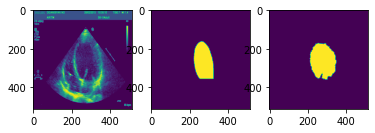

In [12]:
import matplotlib.pyplot as plt
plt.subplot(131)
plt.imshow(imgs[0])
plt.subplot(132)
plt.imshow(msks[0])
plt.subplot(133)
plt.imshow(segm.predict(imgs[0]))

In [183]:
results_gac = {'dice' : [], 'jaccard' : [], 'info' : []}

for i, (pat, cat, *_) in tqdm(ekb.df_patients.iterrows(), total = len(ekb.df_patients)):
    imgs, msks = ekb.get_sequence(pat, cat)
    segm = GAC(msks[0], C = 1, sigma=2, w = [0.7, 0.2, 0.1], iters = 500, v=2, dt=1)
    for ind, (img, msk) in enumerate(zip(imgs, msks)):
        pred_msk = segm.predict(img)
        d = dice(msk, pred_msk)
        j = jaccard(msk, pred_msk)
        results_gac['dice'].append(d)
        results_gac['jaccard'].append(j)
        results_gac['info'].append([ind, pat, cat])

Text(0, 25, ' Среднее значение 0.770')

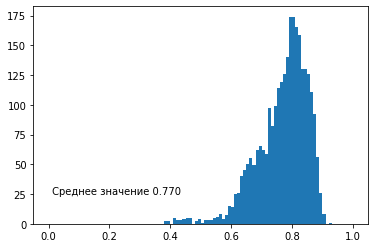

In [184]:
plt.hist(results_gac['dice'], range=[0,1], bins=100)
plt.text(0, 25, ' Среднее значение {:0.3f}'.format(np.mean(results_gac['dice'])))

In [156]:
import pandas as pd
df = pd.DataFrame(results)
df.to_csv('level_set/results/ls.csv', header=True, index=False,)

In [185]:
import pandas as pd
df = pd.DataFrame(results_gac)
df.to_csv('level_set/results/gac.csv', header=True, index=False,)

In [68]:
list_dice_2 = []
# list_jaccard_2 = []
iters_dice_2 = []
# iters_jaccard_2 = []
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
for img, msk in tqdm(zip(imgs, msks), total=len(imgs)):
    dice_temp = []
#     jaccard_temp = []
    segm = GAC(msks[0], C = 1)
    for i in range(0, 2000, 1):
        msk_pred = segm.predict(img, contin=True, it=i)
        dice_temp.append(dice(msk, msk_pred))
#         jaccard_temp.append(jaccard(msk, msk_pred))
    list_dice_2.append(np.max(dice_temp))
#     list_jaccard_2.append(np.max(jaccard_temp))
    iters_dice_2.append(np.argmax(dice_temp))
#     iters_jaccard_2.append(np.argmax(jaccard_temp))

In [ ]:
list_dice_3 = []
# list_jaccard_3 = []
iters_dice_3 = []
# iters_jaccard_3 = []
imgs, msks = ekb.get_sequence('05', 'DKMP')
segm = GAC(msks[0], C = 1)
for img, msk in tqdm(zip(imgs, msks), total=len(imgs)):
    dice_temp = []
#     jaccard_temp = []
    segm = GAC(msks[0], C = 1)
    for i in range(0, 2000, 1):
        msk_pred = segm.predict(img, contin=True, it=i)
        dice_temp.append(dice(msk, msk_pred))
#         jaccard_temp.append(jaccard(msk, msk_pred))
    list_dice_3.append(np.max(dice_temp))
#     list_jaccard_3.append(np.max(jaccard_temp))
    iters_dice_3.append(np.argmax(dice_temp))
#     iters_jaccard_3.append(np.argmax(jaccard_temp))

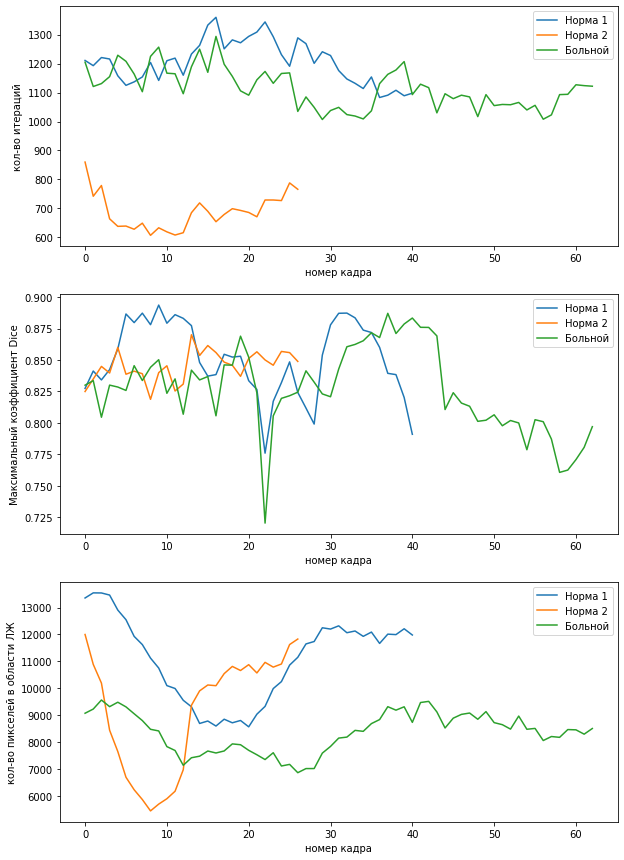

In [72]:
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(iters_dice_1, label='Норма 1')
plt.plot(iters_dice_2, label='Норма 2')
plt.plot(iters_dice_3, label='Больной')
plt.xlabel('номер кадра')
plt.ylabel('кол-во итераций')
plt.legend()
# plt.subplot(222)
# plt.plot(iters_jaccard_1, label='Норма 1')
# plt.plot(iters_jaccard_2, label='Норма 2')
# # plt.plot(iters_jaccard_3, label='Больной')
# plt.xlabel('номер кадра')
# plt.ylabel('количество итераций для масимального значения Jaccard')
# plt.legend()
plt.subplot(312)
plt.plot(list_dice_1, label='Норма 1')
plt.plot(list_dice_2, label='Норма 2')
plt.plot(list_dice_3, label='Больной')
plt.xlabel('номер кадра')
plt.ylabel('Максимальный коэффициент Dice')
plt.legend()
# plt.subplot(224)
# plt.plot(list_jaccard_1, label='Норма 1')
# # plt.plot(list_jaccard_2, label='Норма 2')
# # plt.plot(list_jaccard_3, label='Больной')
# plt.xlabel('номер кадра')
# plt.ylabel('Максимальный коэффициент Jaccard')
# plt.legend()
plt.subplot(313)
plt.plot(area_1, label='Норма 1')
plt.plot(area_2, label='Норма 2')
plt.plot(area_3, label='Больной')
plt.xlabel('номер кадра')
plt.ylabel('кол-во пикселей в области ЛЖ')
plt.legend()
plt.savefig('res.png', bbox_inches='tight', pad_inches=0)

In [54]:
area_1 = []
imgs, msks = ekb.get_sequence('04', 'Norma')
for msk in msks:
    area = len(np.where(msk != 0)[0])
    area_1.append(area)
area_2 = []
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
for msk in msks:
    area = len(np.where(msk != 0)[0])
    area_2.append(area)
area_3 = []
imgs, msks = ekb.get_sequence('05', 'DKMP')
for msk in msks:
    area = len(np.where(msk != 0)[0])
    area_3.append(area)
    
    

In [57]:
df = ekb.df_images[(ekb.df_images['patient'] == '04') & (ekb.df_images['category'] == 'Norma')]

In [58]:
df.sort_values('obj_name')

,patient,category,img_shape,obj_name,bbox
328,04,Norma,"(600, 800)",01.bmp,None
329,04,Norma,"(600, 800)",02.bmp,None
330,04,Norma,"(600, 800)",03.bmp,None
331,04,Norma,"(600, 800)",04.bmp,None
332,04,Norma,"(600, 800)",05.bmp,None
333,04,Norma,"(600, 800)",06.bmp,None
334,04,Norma,"(600, 800)",07.bmp,None
335,04,Norma,"(600, 800)",08.bmp,None
336,04,Norma,"(600, 800)",09.bmp,None
337,04,Norma,"(600, 800)",10.bmp,None
